### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient = pd.read_csv('Patient 253_data.csv')

In [3]:
patient.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,...,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000
mean,0.027389,0.235033,0.560358,1.328098,1.867062,10.899384,1.500301,1.051138,1.010954,1.031061,...,1.840984,1.836485,2.052680,2.010883,0.841377,1.559839,2.018155,1.994423,1.921773,49.729119
std,0.012440,0.020641,0.022033,0.015605,0.038987,6.831706,0.301730,0.023458,0.001915,0.014034,...,0.026113,0.021618,0.029000,0.019559,0.059424,0.025641,0.010867,0.003096,0.017508,13.188389
min,0.004030,0.110132,0.530776,1.307325,1.742113,2.842504,1.165979,1.027752,0.986944,1.000623,...,1.722933,1.679297,1.911292,1.957406,0.325333,1.439790,1.998462,1.981065,1.859821,32.000000
25%,0.022746,0.231477,0.545182,1.317775,1.848516,8.891449,1.365864,1.037728,1.010516,1.022147,...,1.830574,1.831639,2.055966,1.996616,0.835291,1.550040,2.010599,1.992640,1.915802,41.100000
50%,0.024554,0.240242,0.552912,1.321709,1.865214,9.741541,1.389513,1.041183,1.011502,1.035565,...,1.846835,1.839227,2.061006,2.013190,0.853646,1.563757,2.016301,1.994516,1.923721,45.200000
75%,0.026427,0.245686,0.572598,1.329831,1.874675,11.092539,1.492491,1.053541,1.012314,1.039242,...,1.858286,1.846336,2.065185,2.023453,0.868060,1.576972,2.023282,1.996482,1.932365,54.700000
max,0.076482,0.291588,0.691723,1.375196,1.985102,137.213363,3.322346,1.182148,1.013875,1.078829,...,1.891657,1.890576,2.074823,2.066371,0.939290,1.607929,2.066292,2.003624,1.983638,93.100000


In [4]:
X=patient.drop('BIS', axis=1)
y= patient['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

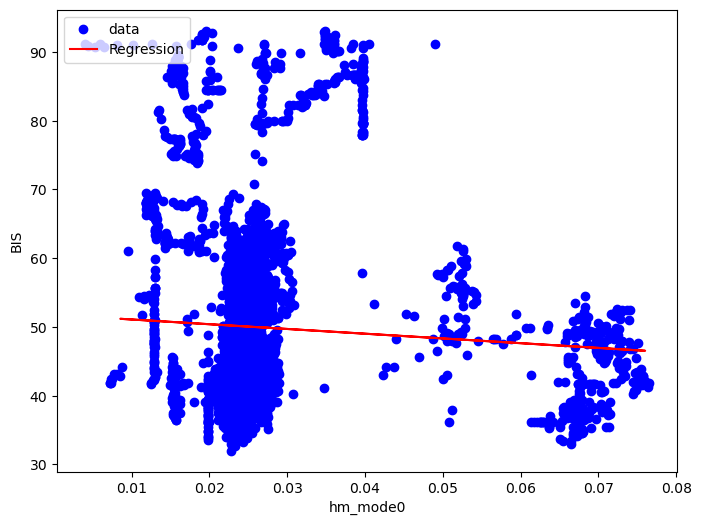

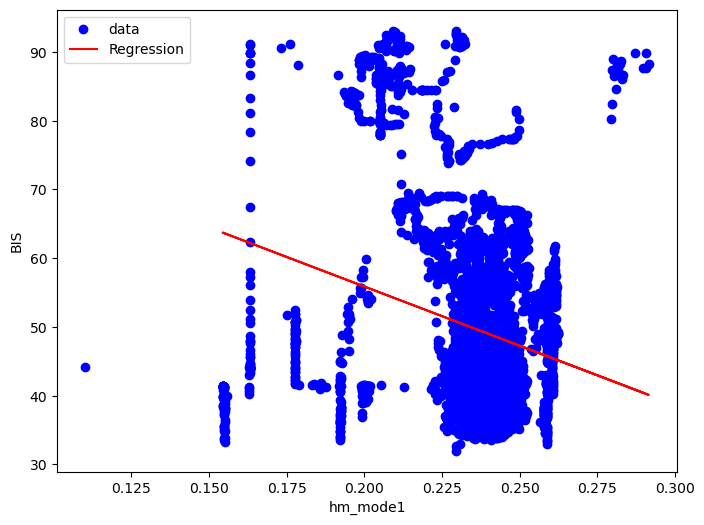

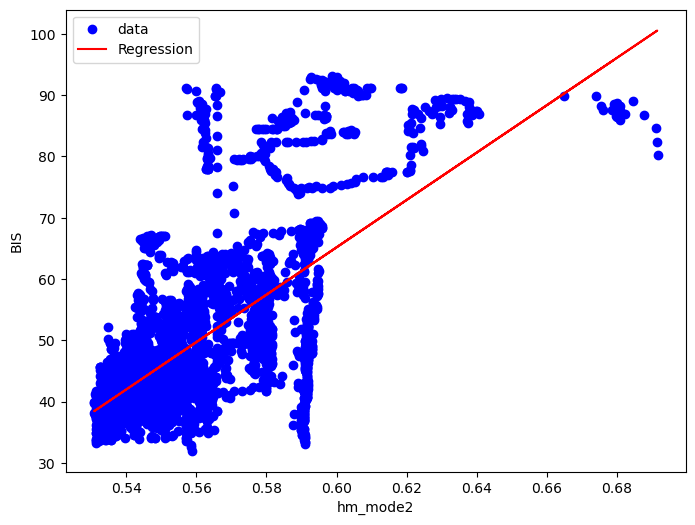

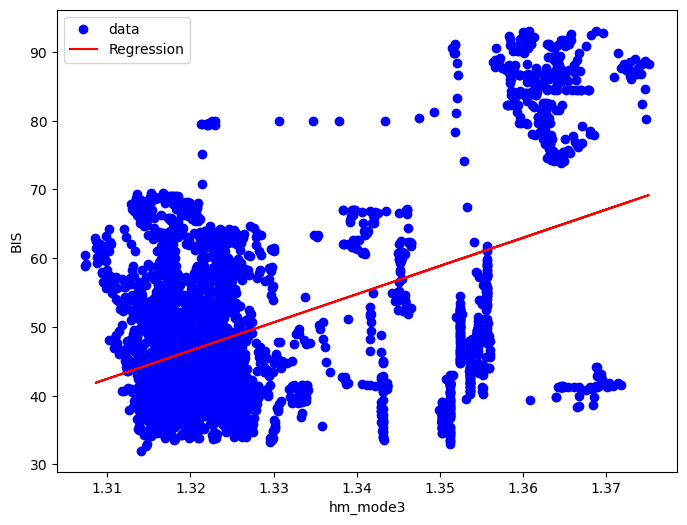

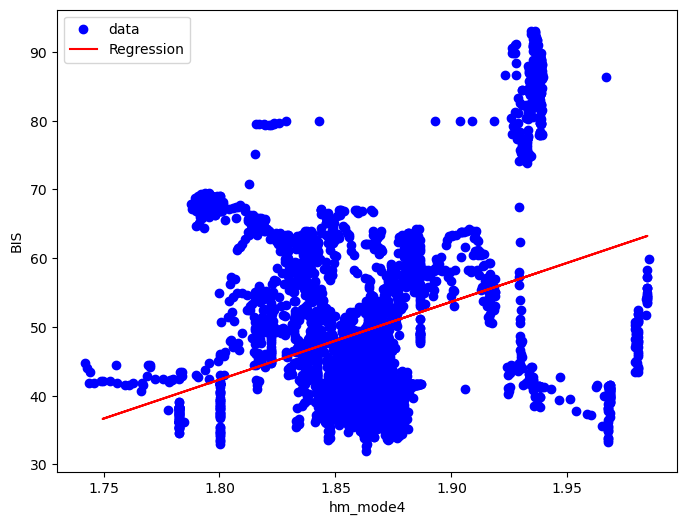

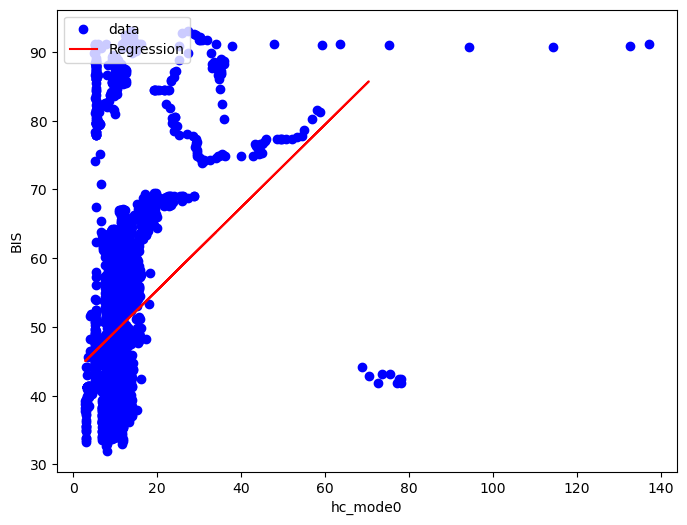

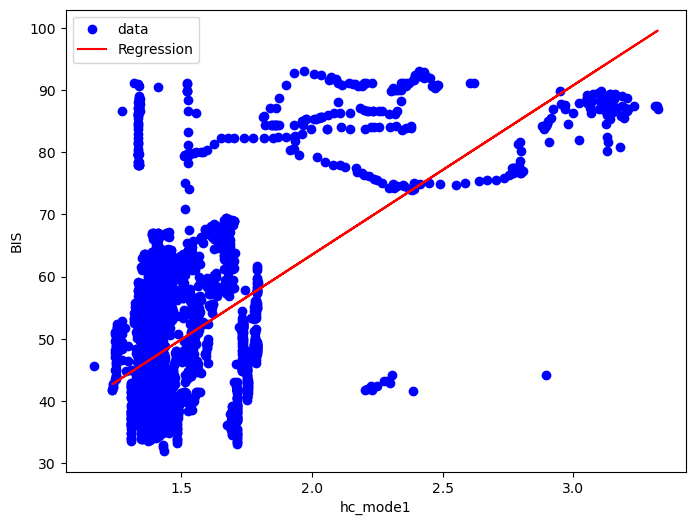

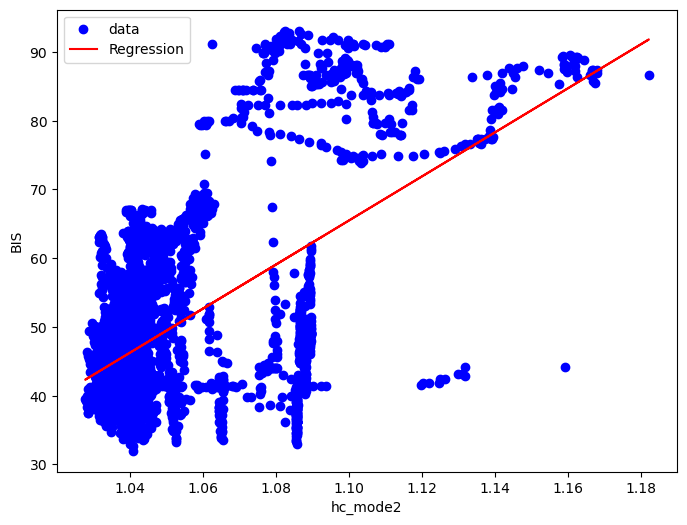

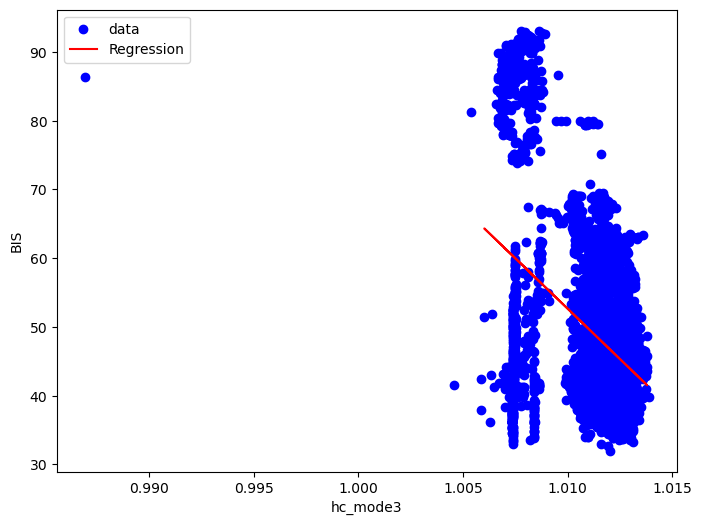

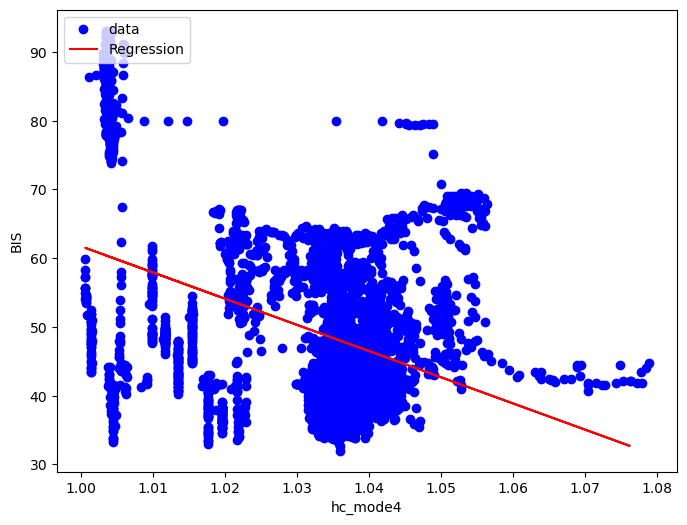

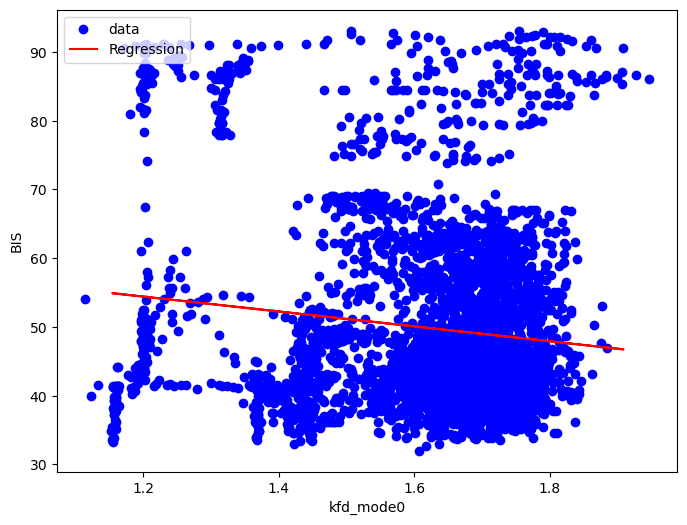

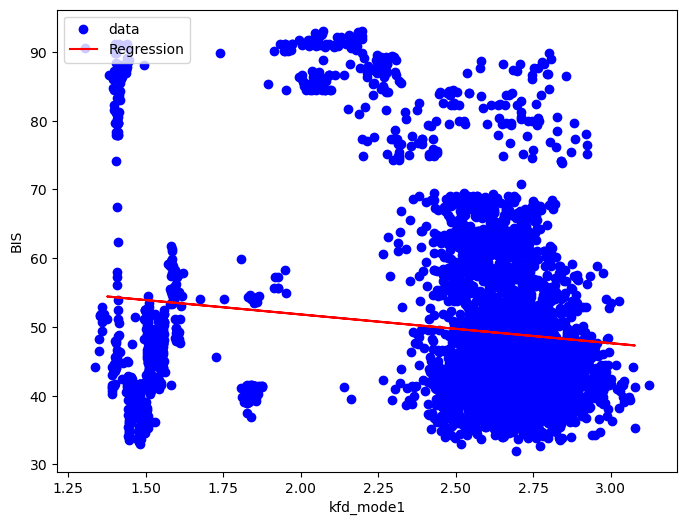

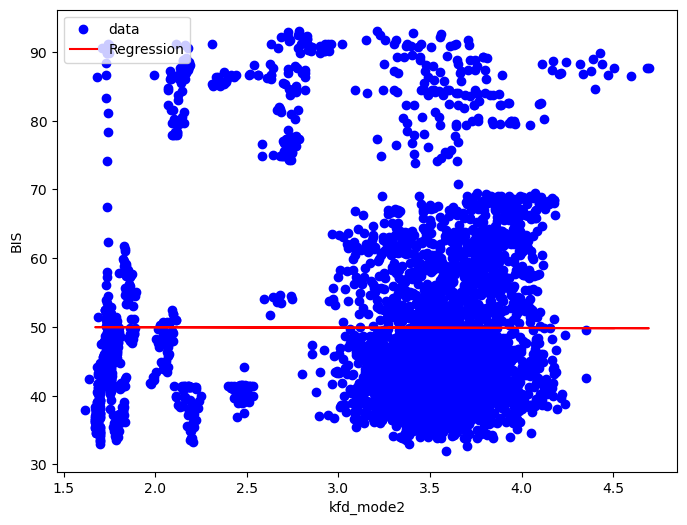

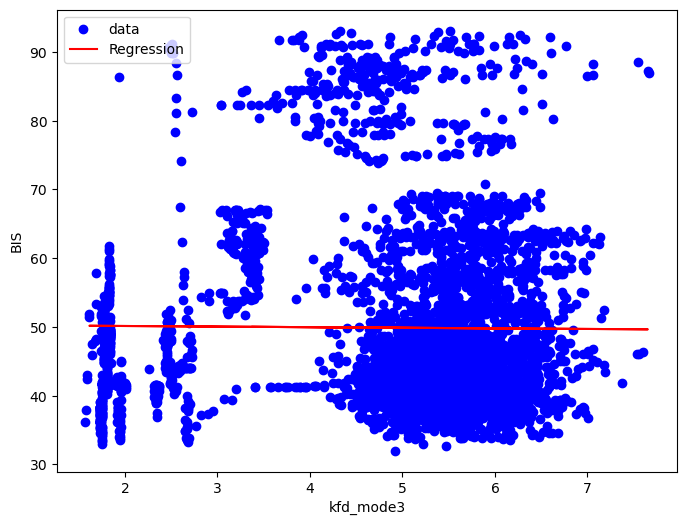

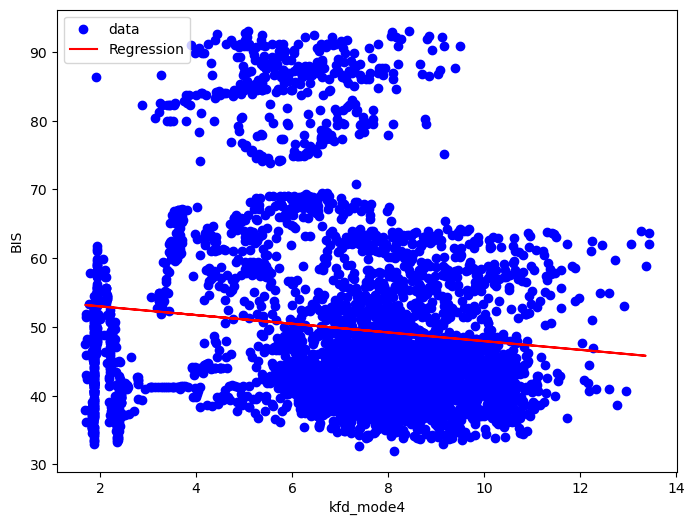

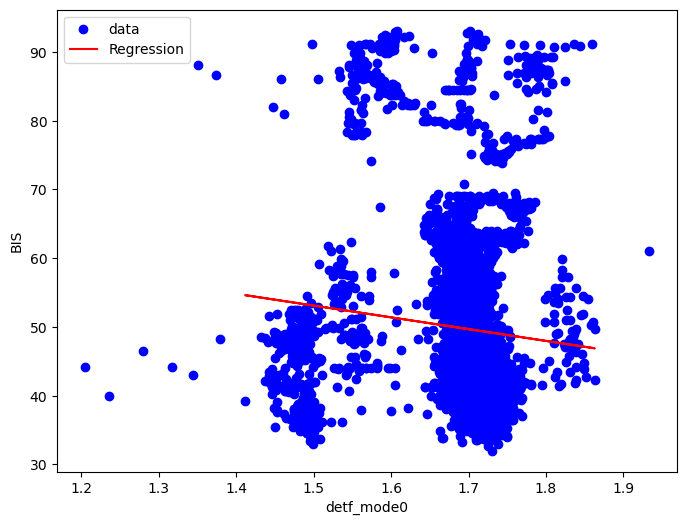

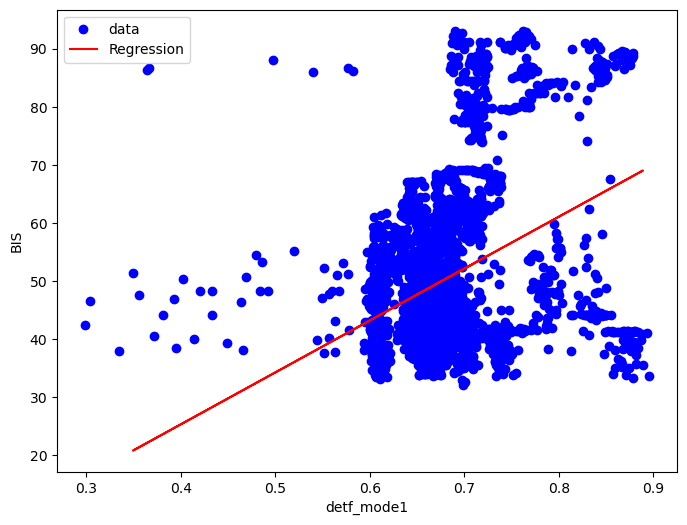

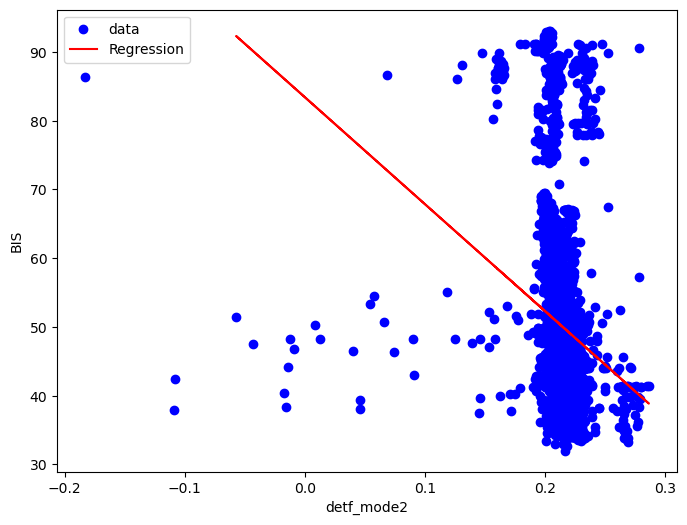

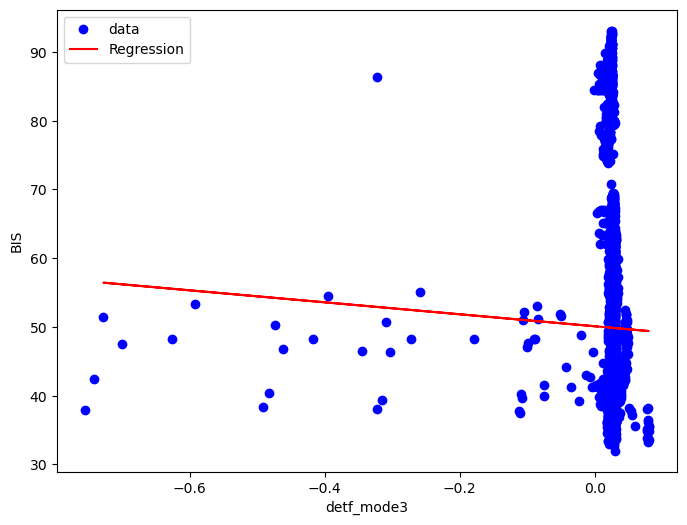

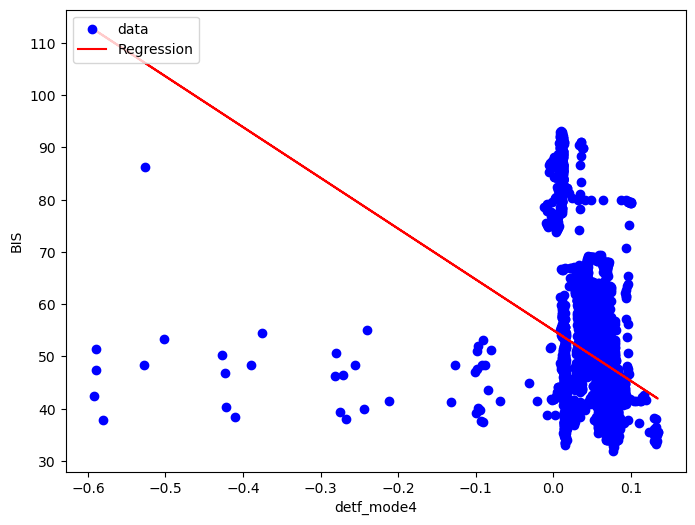

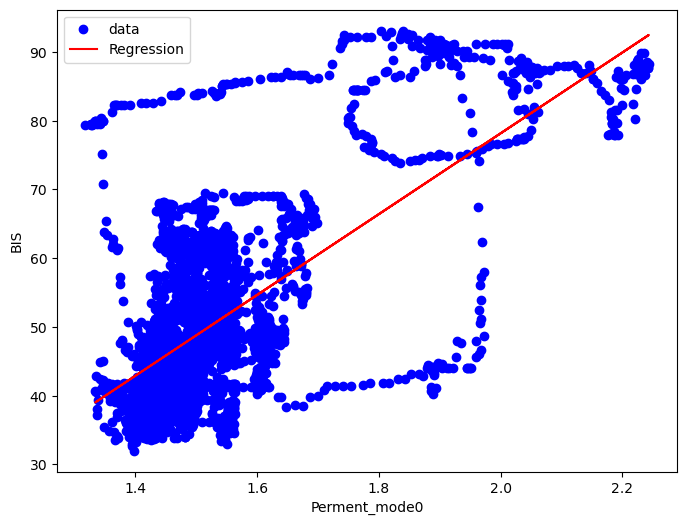

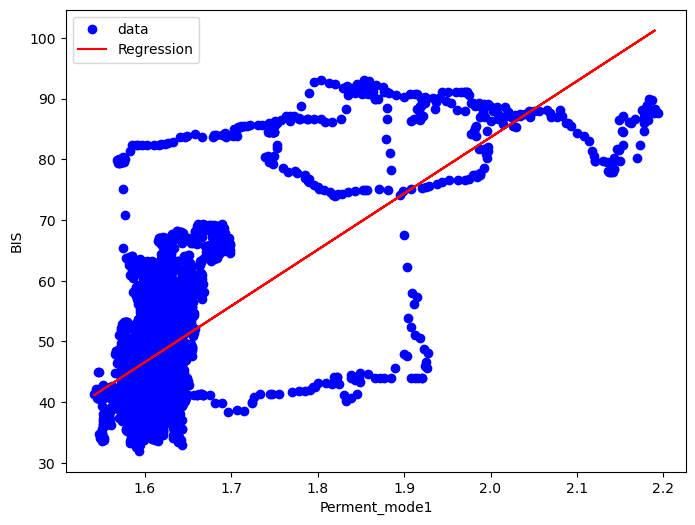

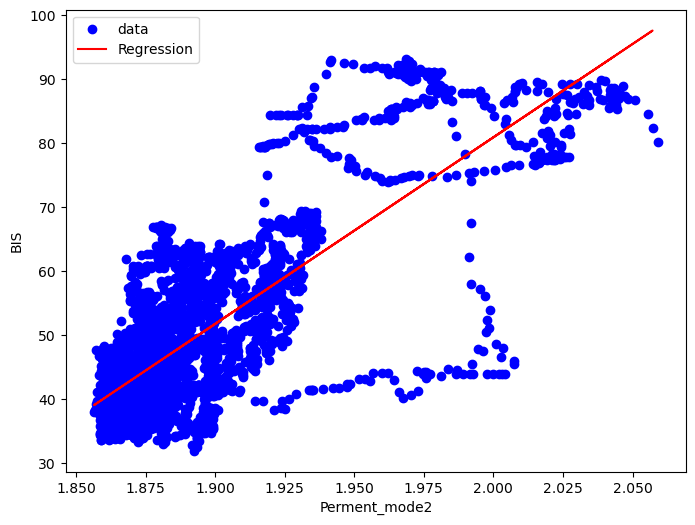

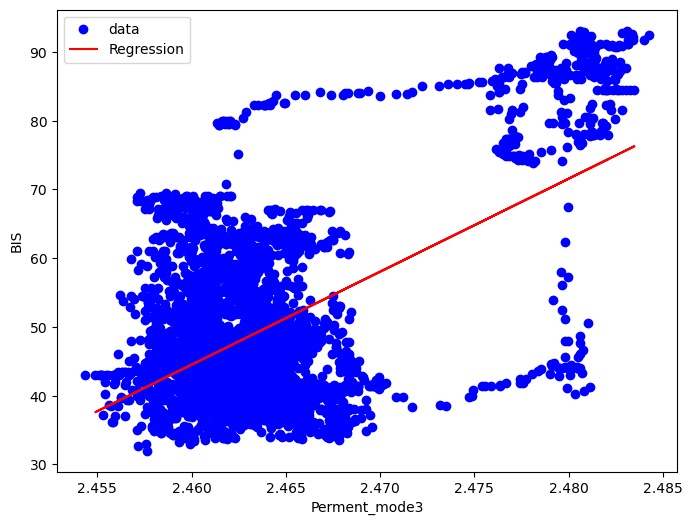

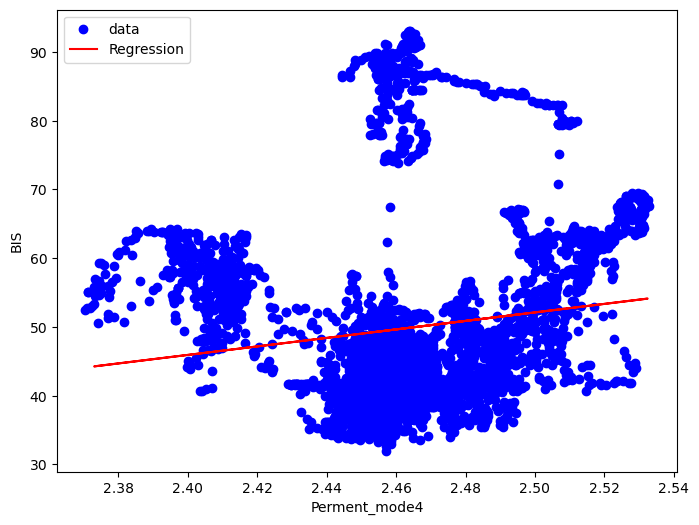

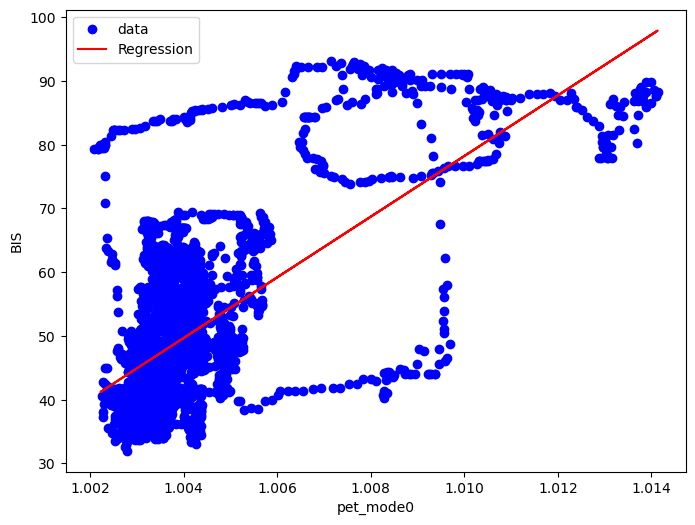

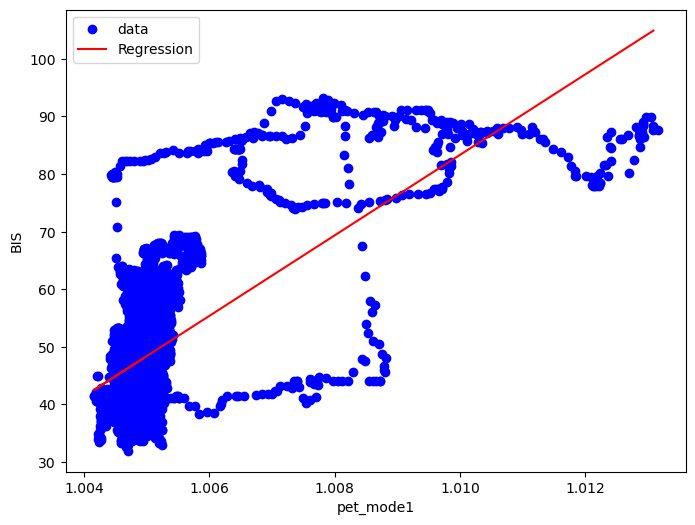

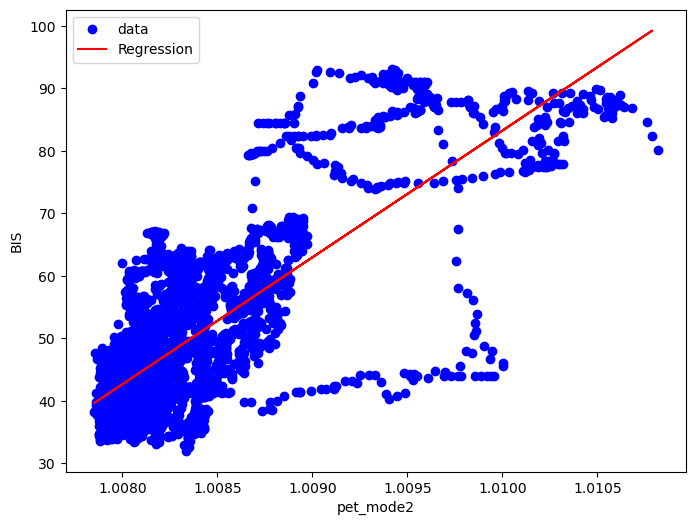

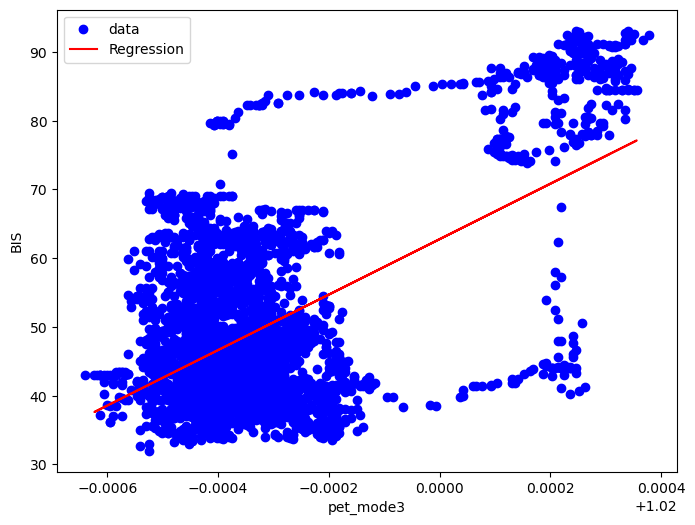

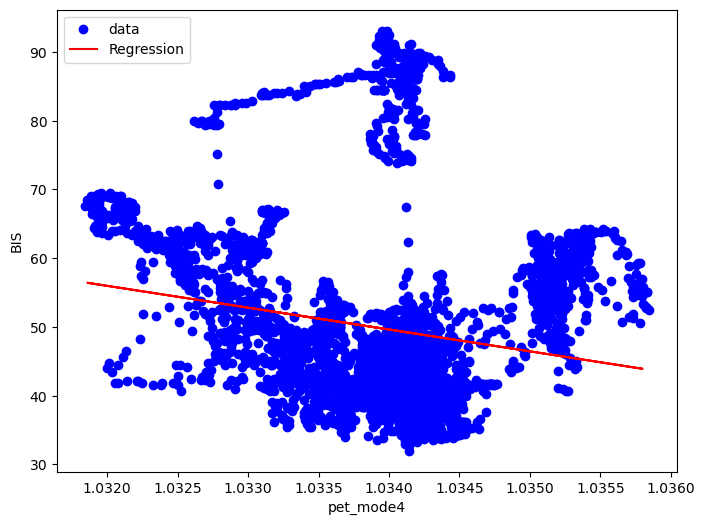

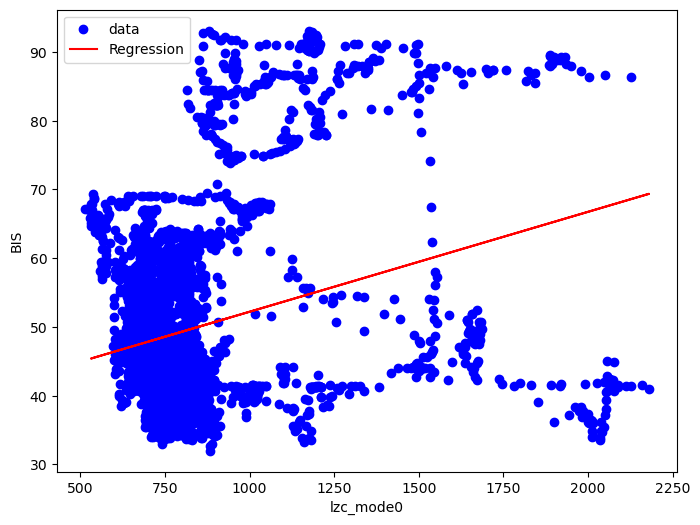

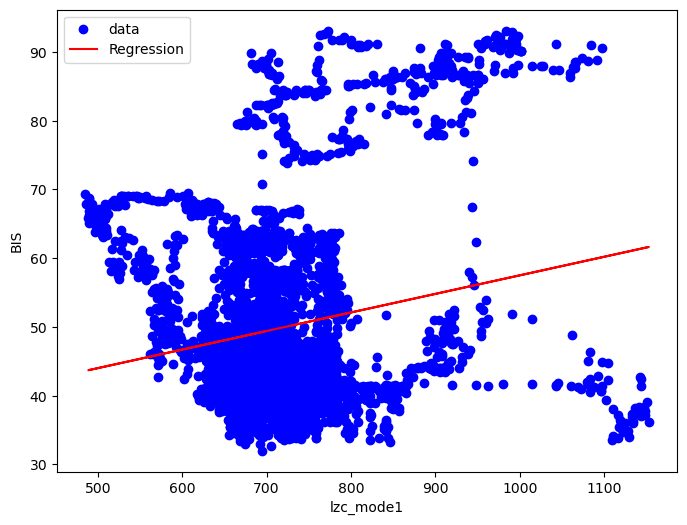

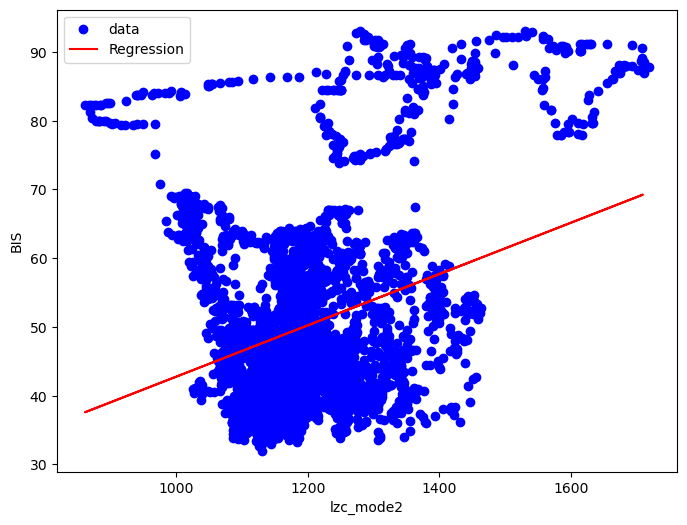

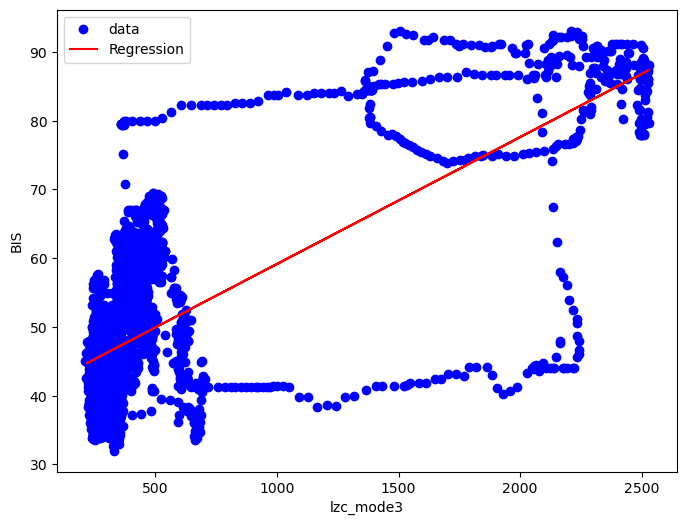

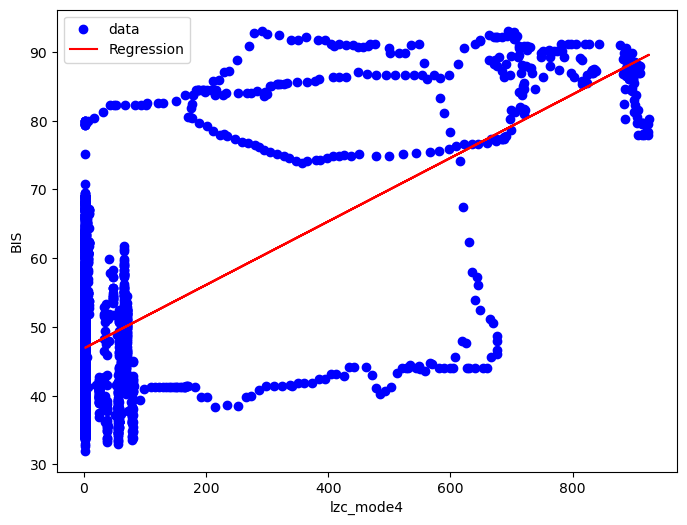

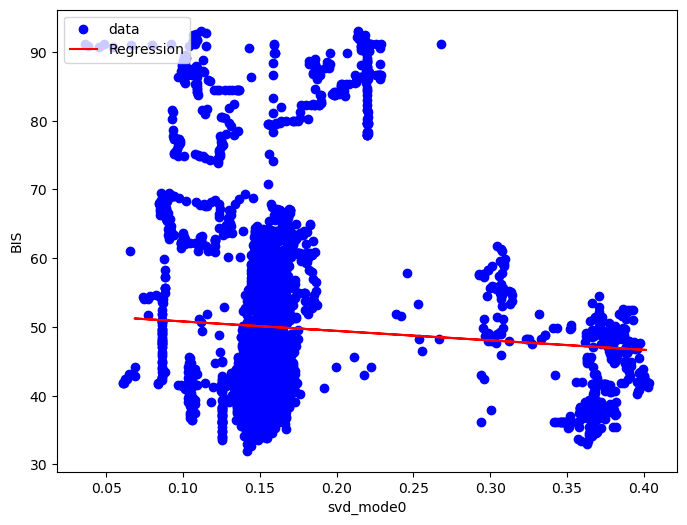

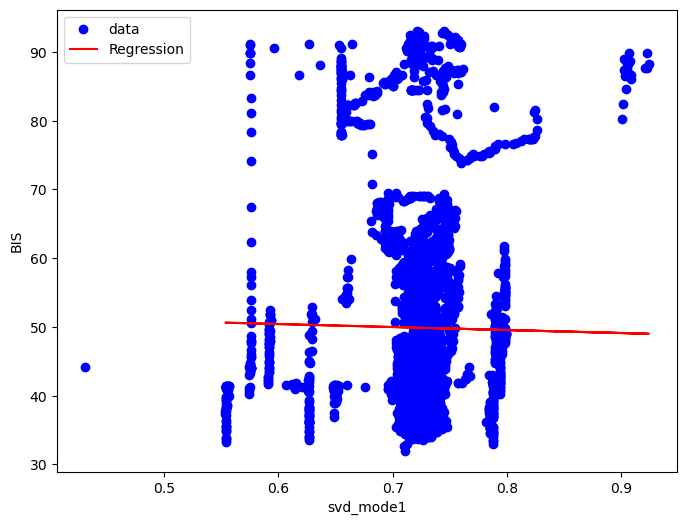

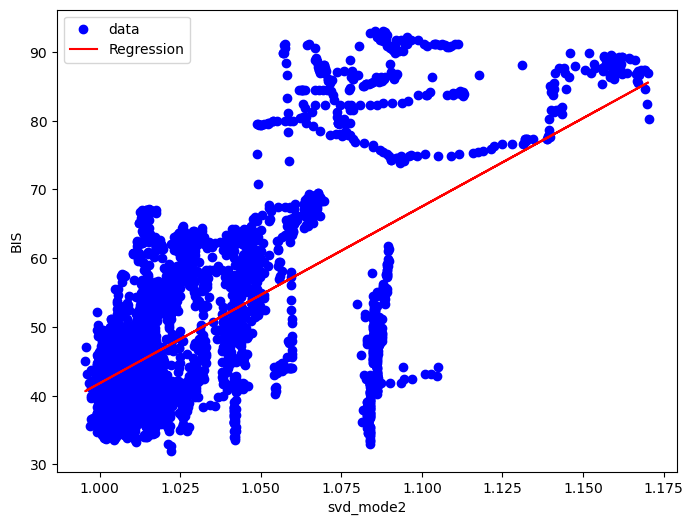

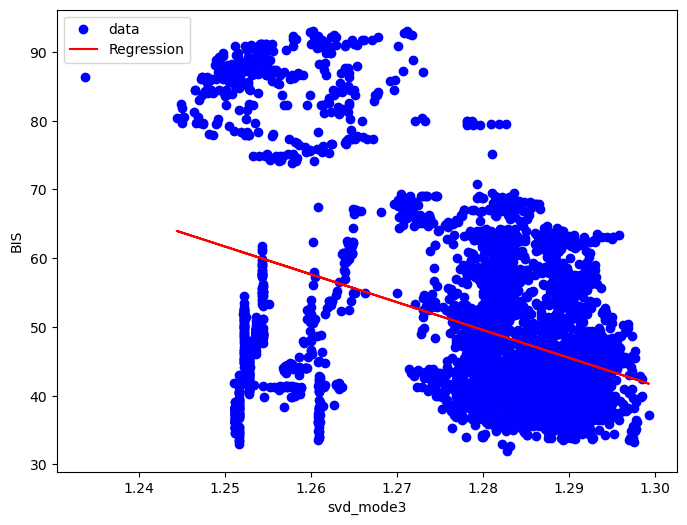

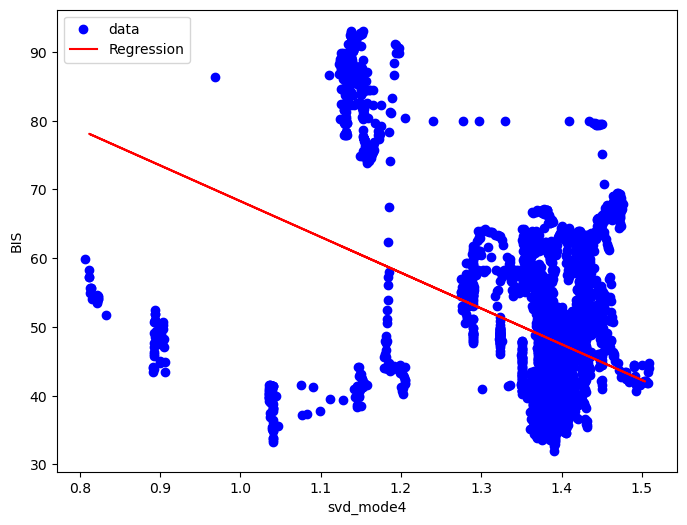

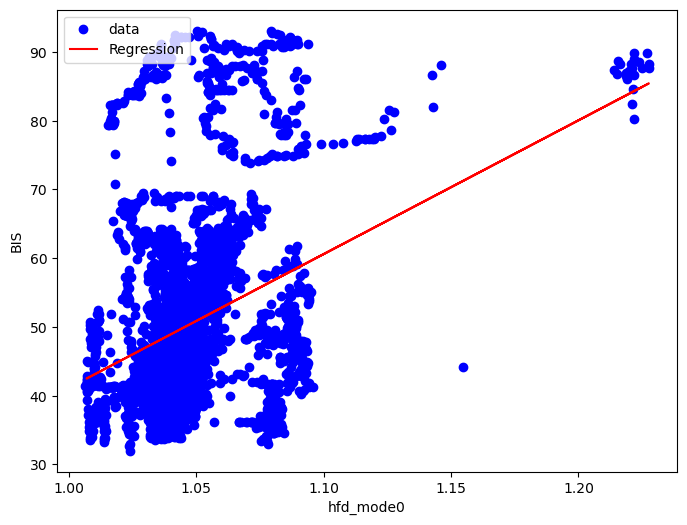

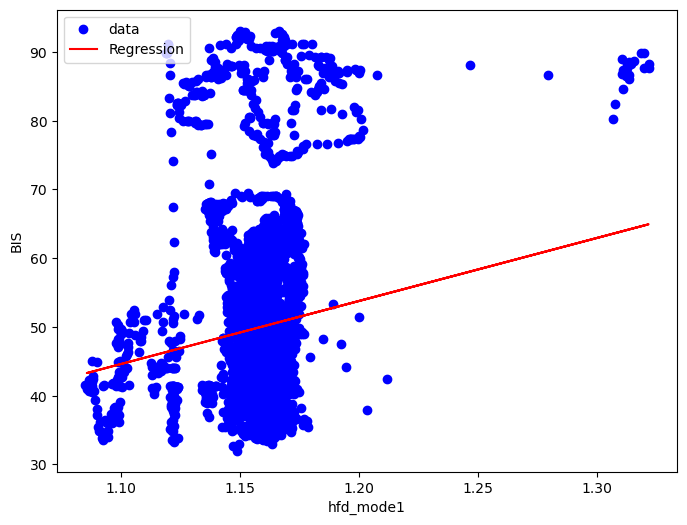

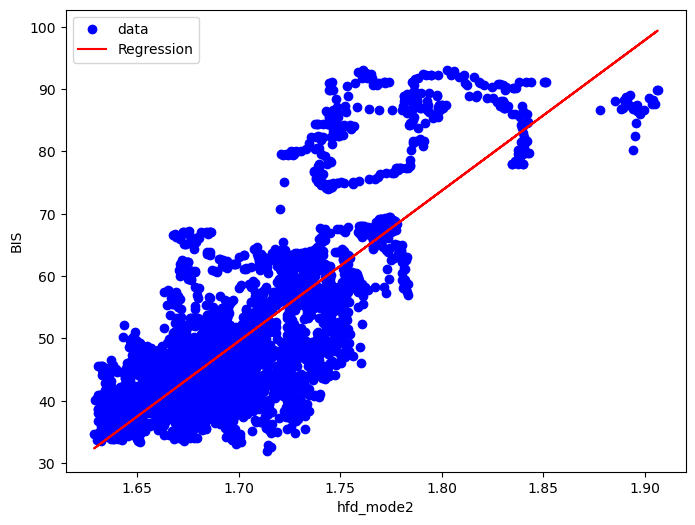

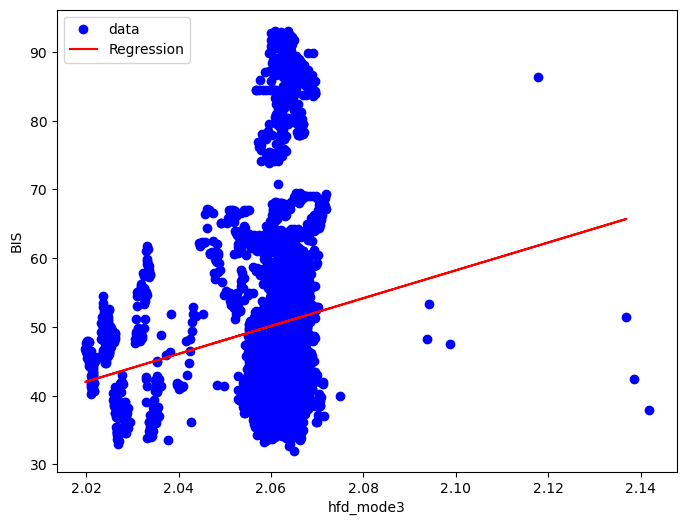

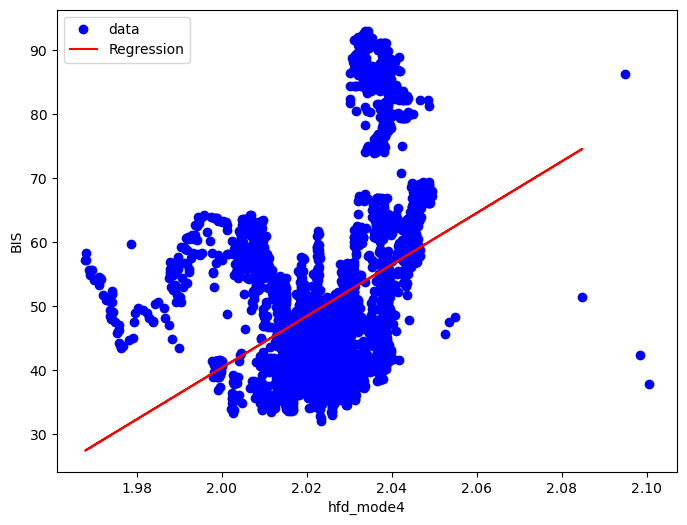

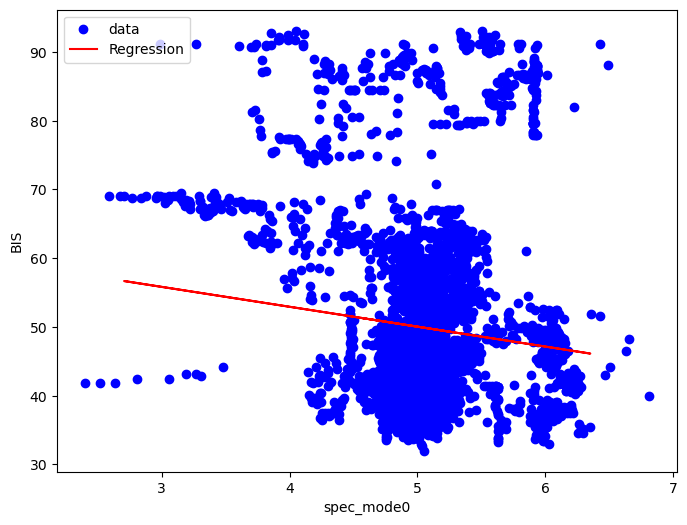

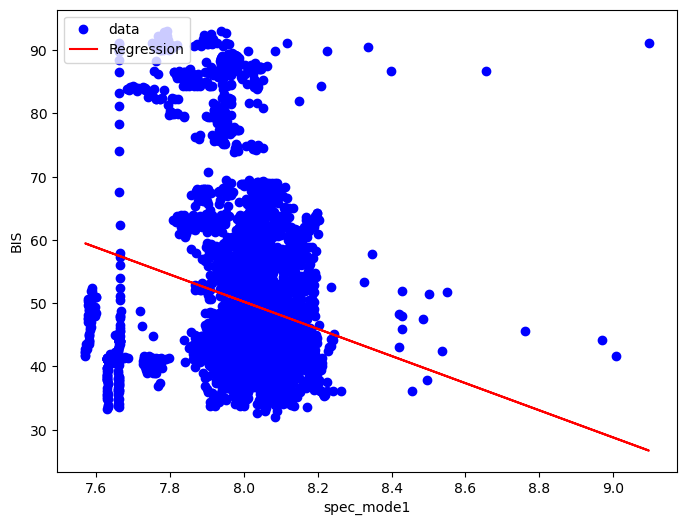

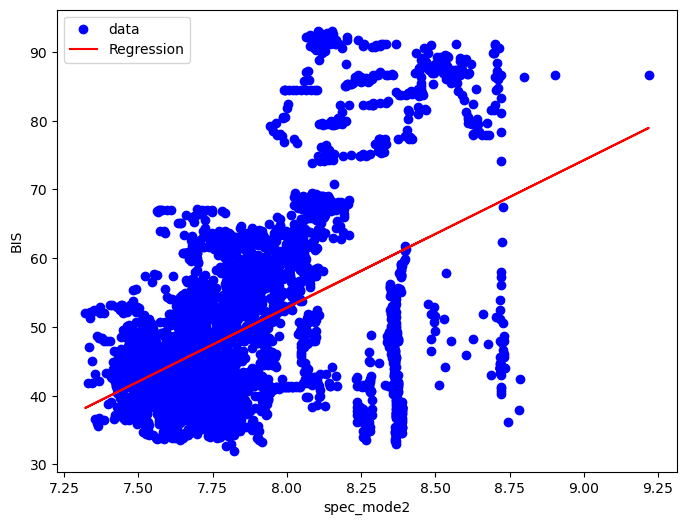

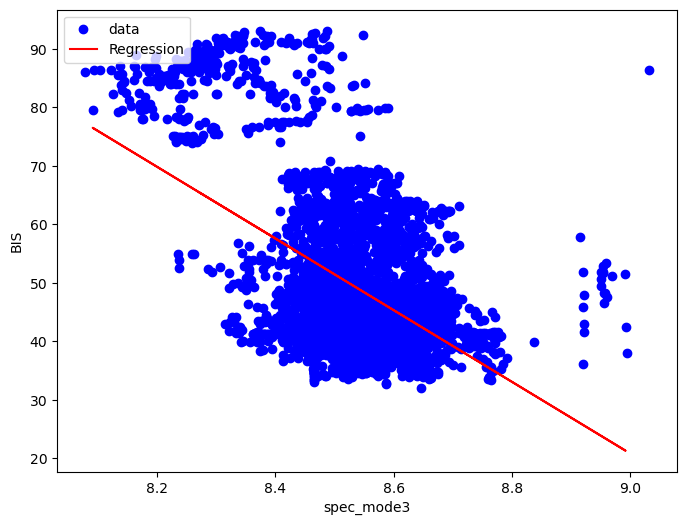

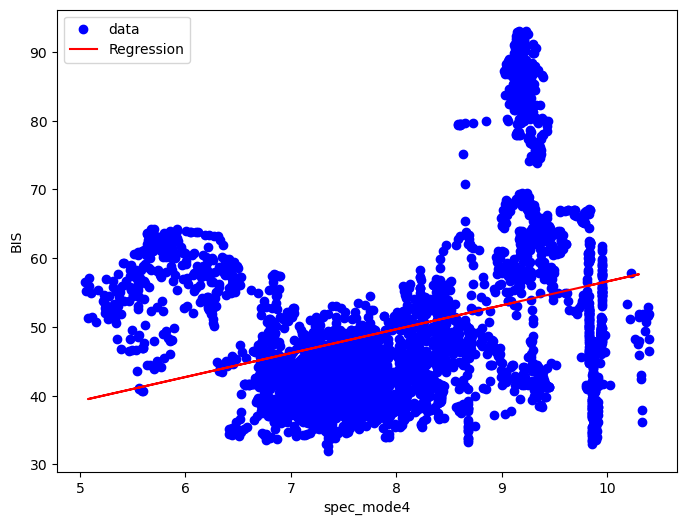

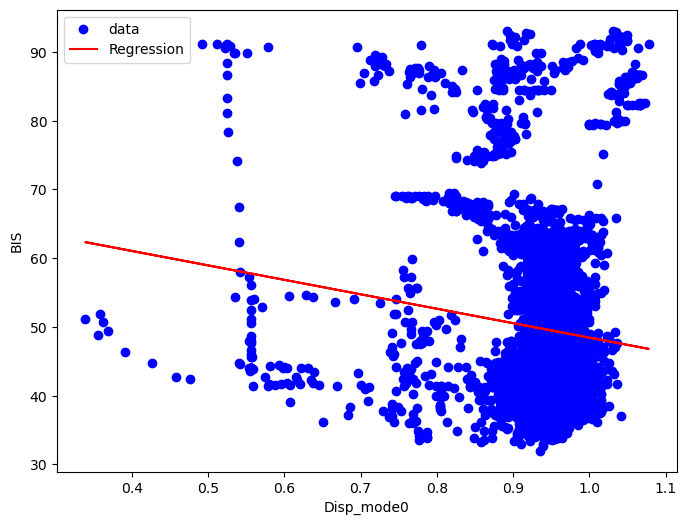

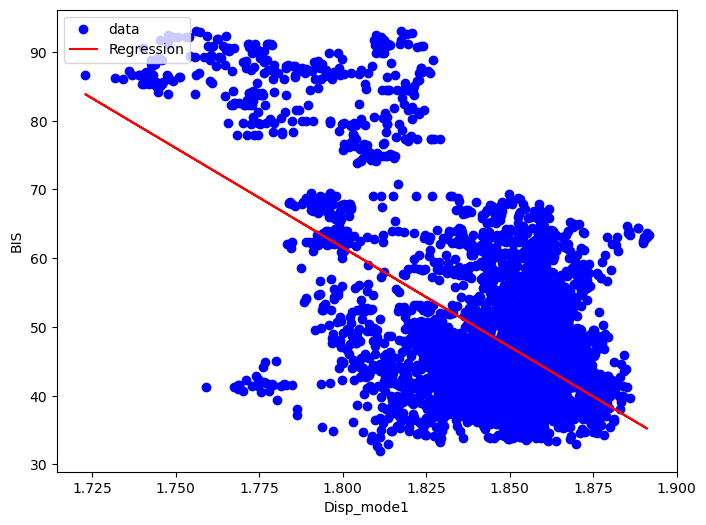

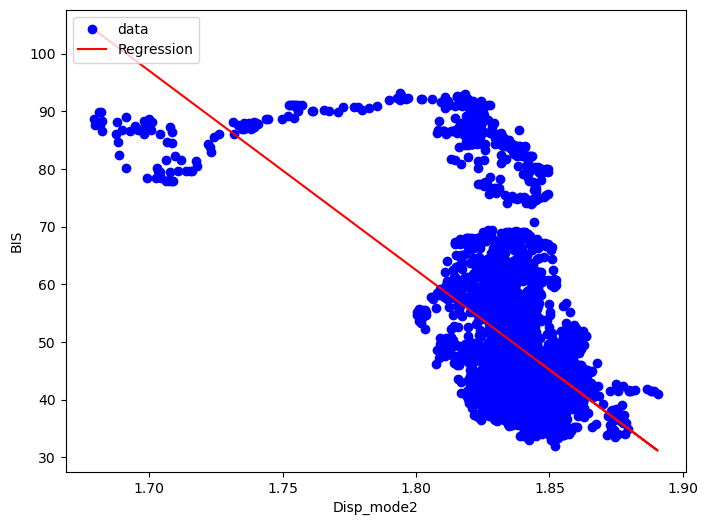

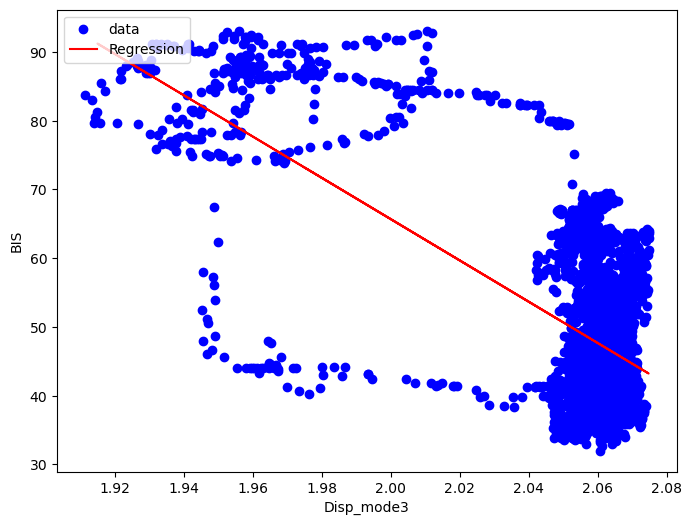

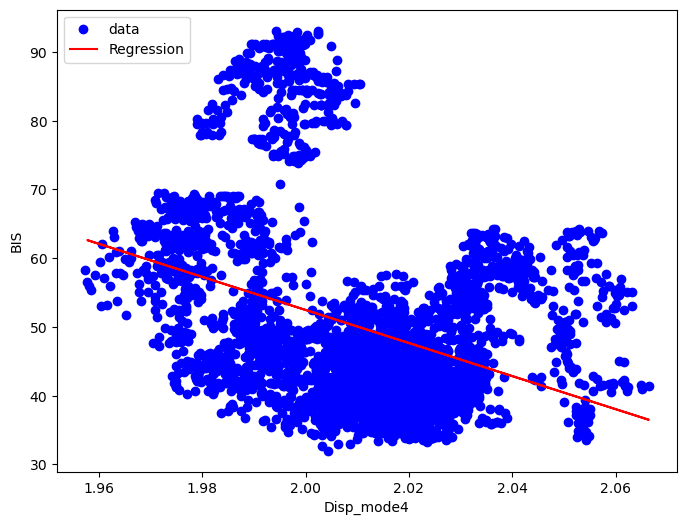

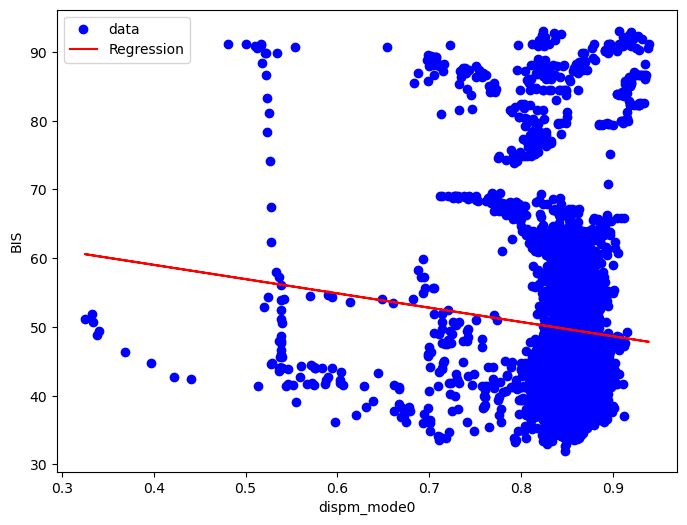

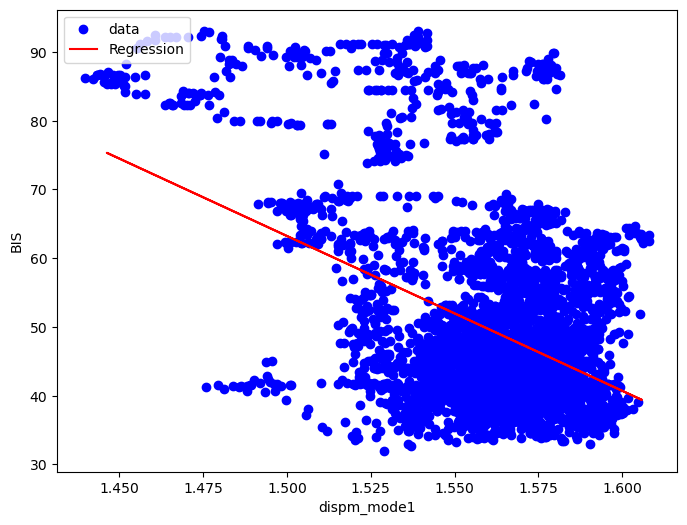

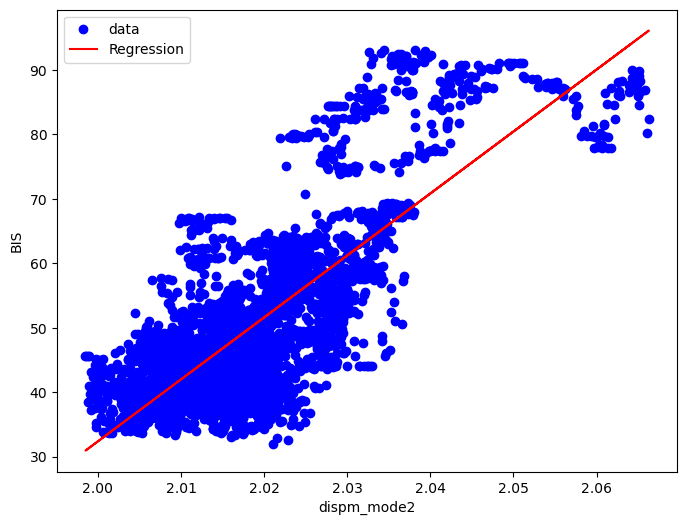

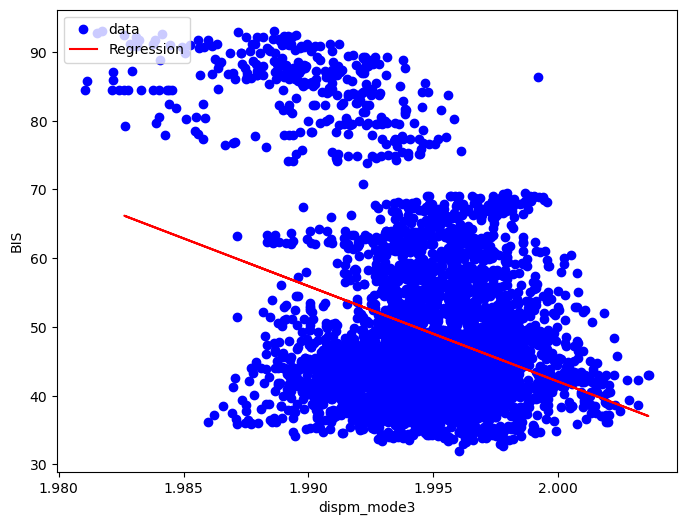

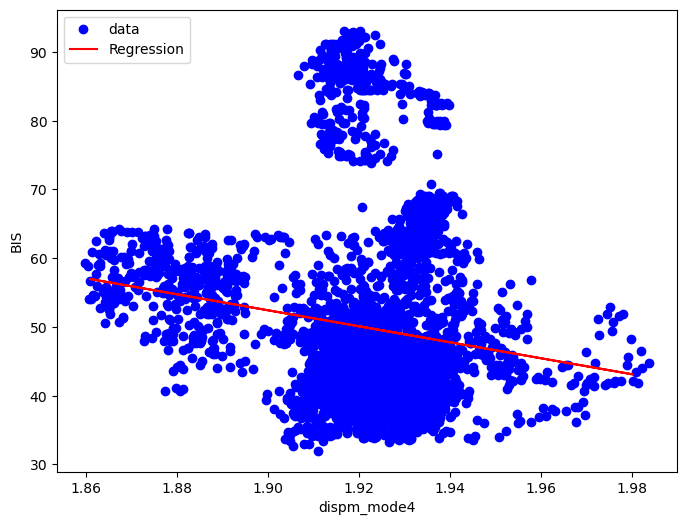

In [6]:

for column in patient.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
22,Perment_mode2_r2,63.892424
27,pet_mode2_r2,63.416105
57,dispm_mode2_r2,61.756640
42,hfd_mode2_r2,60.371691
33,lzc_mode3_r2,54.856146
21,Perment_mode1_r2,51.973148
20,Perment_mode0_r2,50.544444
26,pet_mode1_r2,49.493106
25,pet_mode0_r2,49.032868
53,Disp_mode3_r2,46.663845


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
22  Perment_mode2    0.355802
57    dispm_mode2    0.091841
33      lzc_mode3    0.090075
27      pet_mode2    0.065669
42      hfd_mode2    0.061571
19     detf_mode4    0.052777
3        hm_mode3    0.041506
11      kfd_mode1    0.022649
29      pet_mode4    0.016693
39      svd_mode4    0.015418
30      lzc_mode0    0.013067
52     Disp_mode2    0.012749
9        hc_mode4    0.012206
4        hm_mode4    0.011994
24  Perment_mode4    0.010749
53     Disp_mode3    0.010395
44      hfd_mode4    0.010134
59    dispm_mode4    0.006879
7        hc_mode2    0.006292
1        hm_mode1    0.005952
5        hc_mode0    0.005643
43      hfd_mode3    0.004913
54     Disp_mode4    0.004551
49     spec_mode4    0.003917
0        hm_mode0    0.002737
51     Disp_mode1    0.002737
32      lzc_mode2    0.002631
23  Perment_mode3    0.002602
48     spec_mode3    0.002543
36      svd_mode1    0.002418
41      hfd_mode1    0.002415
38      svd_mode3    0.002415
12      kf